#### Import Librabries

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np


#### Books Response

In [2]:
url = "https://books.toscrape.com/"
response = requests.get(url)
response

<Response [200]>

#### Obtaing Price and Title 

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
Data = soup.find_all('article', class_='product_pod')
title_list = []
price_list = []

for Datas in Data:
    title = Datas.h3.a['title']
    price = Datas.find('p', class_='price_color').text # In GBP
    new_price = price.replace("Â£", "") # Removing symbols
    title_list.append(title)
    price_list.append(float(new_price))

title_list # In GBP


['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

#### Coversion API Response

In [4]:
Conversion_URL = "https://v6.exchangerate-api.com/v6/126f6b4c905408df7d653020/latest/GBP"
Conversion_Response = requests.get(Conversion_URL)
Conversion_Response

<Response [200]>

#### Network Error Handling

In [ ]:
if Conversion_Response == '<Response [500]>':
    print('Internal Server Error')
if Conversion_Response == '<Response [503]>':
    print('Service Unavailable')

#### Presenting Results

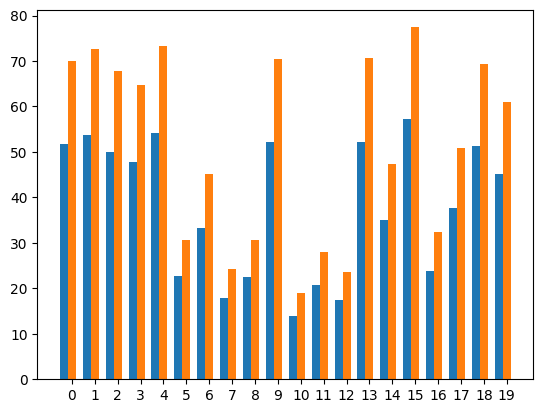

Conversion rates last updated at: Thu, 19 Feb 2026 00:00:02 +0000


,title,price(USD)
0,A Light in the Attic,70.013748
1,Tipping the Velvet,72.677976
2,Soumission,67.755240
3,Sharp Objects,64.671768
4,Sapiens: A Brief History of Humankind,73.340652
5,The Requiem Red,30.631860
6,The Dirty Little Secrets of Getting Your Dream...,45.089016
7,The Coming Woman: A Novel Based on the Life of...,24.248532
8,The Boys in the Boat: Nine Americans and Their...,30.564240
9,The Black Maria,70.527660


In [ ]:
Conversion = Conversion_Response.json()

Rates = Conversion['conversion_rates']

Conversion_Input = input("Enter the 3 letter code of the currency you want to convert to: ").upper()
Converted_Price_List = []
for keys in Rates.keys():
    for i in range(len(price_list)):
        if keys == Conversion_Input:
            Converted_Price = price_list[i] * Rates[keys]
            Converted_Price_List.append(Converted_Price)
        
if Converted_Price_List == []:
    print("Currency is invalid/not supported for conversion")

with open('Book_Titles.csv','w', newline="") as file:
    writer = csv.writer(file)
    writer.writerow(['Title', f'Price({Conversion_Input})'])
    for i in range(len(Converted_Price_List)):
        writer.writerow([title_list[i],Converted_Price_List[i]])

d = {'title':title_list,f"price({Conversion_Input})":Converted_Price_List}
Last_Conversion_Time = Conversion['time_last_update_utc']

Price_Array = np.array(price_list)
Converted_Price_Array = np.array(Converted_Price_List)
positions = np.arange(len(title_list))
Both_Prices_Array = np.array([Price_Array, Converted_Price_Array])
width = 0.35


for i in range(len(Both_Prices_Array)):
    plt.bar(positions + width * i, Both_Prices_Array[i], width)

plt.xticks(positions + width, positions) # postiions corresponds to index of title in table
plt.show()

print(f"Conversion rates last updated at: {Last_Conversion_Time}")
pd.DataFrame(d)
